#### Sentiment analysis (positive, negative, neutral)

In [3]:
#Import the Library
from pysentimiento import create_analyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Create a sentiment analyzer in Spanish
analyzer = create_analyzer(task="sentiment", lang="es")

#Comments list
comments = [
    "El servicio fue excelente y rápido.",
    "Estoy satisfecho con al entrega.",
    "Me encantó la atención que recibí.",
    "No volvería a comprar aquí, fue una mala experiencia.",
    "Todo fue perfecto, superó mis expectativas.",
    "El envío llegó en buen estado, excenlente.",
    "Buena calidad y buen precio.",
    "El soporte técnico no resolvió mi problema.",
    "Estoy muy feliz con mi compra.",
    "No me gustó para nada el servicio al cliente."
]


In [5]:
#Sentiment analysis
results = []
for comment in comments:
    result = analyzer.predict(comment)
    results.append({
        "Comment": comment,
        "Feelings": result.output,
        "Prob_POS": round(result.probas["POS"], 2),
        "Prob_NEG": round(result.probas["NEG"], 2),
        "Probability": round(result.probas[result.output], 2)
    })

#Create the DataFrame
df_results = pd.DataFrame(results)

#Show result
print("🔍 Sentiment Analysis (BERT model in Spanish):")
display(df_results)

🔍 Sentiment Analysis (BERT model in Spanish):


,Comment,Feelings,Prob_POS,Prob_NEG,Probability
0,El servicio fue excelente y rápido.,POS,0.96,0.00,0.96
1,Estoy satisfecho con al entrega.,POS,0.94,0.00,0.94
2,Me encantó la atención que recibí.,POS,0.97,0.00,0.97
3,"No volvería a comprar aquí, fue una mala exper...",NEG,0.02,0.87,0.87
4,"Todo fue perfecto, superó mis expectativas.",POS,0.94,0.01,0.94
5,"El envío llegó en buen estado, excenlente.",POS,0.89,0.01,0.89
6,Buena calidad y buen precio.,POS,0.88,0.01,0.88
7,El soporte técnico no resolvió mi problema.,NEG,0.02,0.76,0.76
8,Estoy muy feliz con mi compra.,POS,0.95,0.00,0.95
9,No me gustó para nada el servicio al cliente.,NEG,0.01,0.96,0.96


C:\Users\María Fernanda\AppData\Local\Temp\ipykernel_2236\86583992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_results, x="Feelings", palette="Set2")


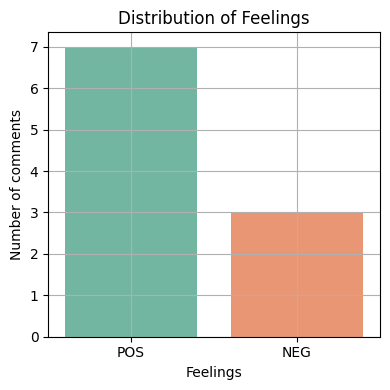

In [6]:
#Visualization
plt.figure(figsize=(4, 4))
sns.countplot(data=df_results, x="Feelings", palette="Set2")
plt.title("Distribution of Feelings")
plt.ylabel("Number of comments")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
#Percentage of positive and negative comments
pcg = df_results["Feelings"].value_counts(normalize=True) * 100
print(pcg)

#Store in variables 
pos_percent = pcg.get("POS", 0)
neg_percent = pcg.get("NEG", 0)

print(f"Percentage of positive comments: {pos_percent:.2f}%")
print(f"Percentage of negative comments: {neg_percent:.2f}%")

#Ratio of positive to negative comments
if neg_percent > 0:
    ratio = pos_percent / neg_percent
    print(f"POS/NEG ratio: {ratio:.2f}")
else:
    print("There are no negative comments, so the ratio cannot be calculated.")

Feelings
POS    70.0
NEG    30.0
Name: proportion, dtype: float64
Percentage of positive comments: 70.00%
Percentage of negative comments: 30.00%
POS/NEG ratio: 2.33


In [9]:
#Export as CSV to work with POWER BI
df_results.to_csv('Feelings.csv', index=False)